In [55]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility
import pandas as pd
from pandas import Series
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [76]:
sheets={'CV std Test':'valiation std cv','CV std Cross-val':'cross-val std cv','CV tree Test':'valiation block cv','CV tree Cross-val':'cross-val block cv'}
features=['snps','snps##gpa##roary','genexp##snps##gpa##roary','genexp##gpa##roary','gpa##roary','genexp##snps','genexp']

feature_map={'snps##gpa##roary':'snps-gpa','genexp##snps##gpa##roary':'snps-gpa-genexp','genexp##gpa##roary':'gpa-genexp','gpa##roary':'gpa','genexp##snps':'genexp-snps'}
cls='RF'
phenotypes=['Tobramycin_S-vs-R', 'Ceftazidim_S-vs-R', 'Ciprofloxacin_S-vs-R', 'Meropenem_S-vs-R']
phenotypes.sort()

#plt.savefig(cls+'_res.pdf')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


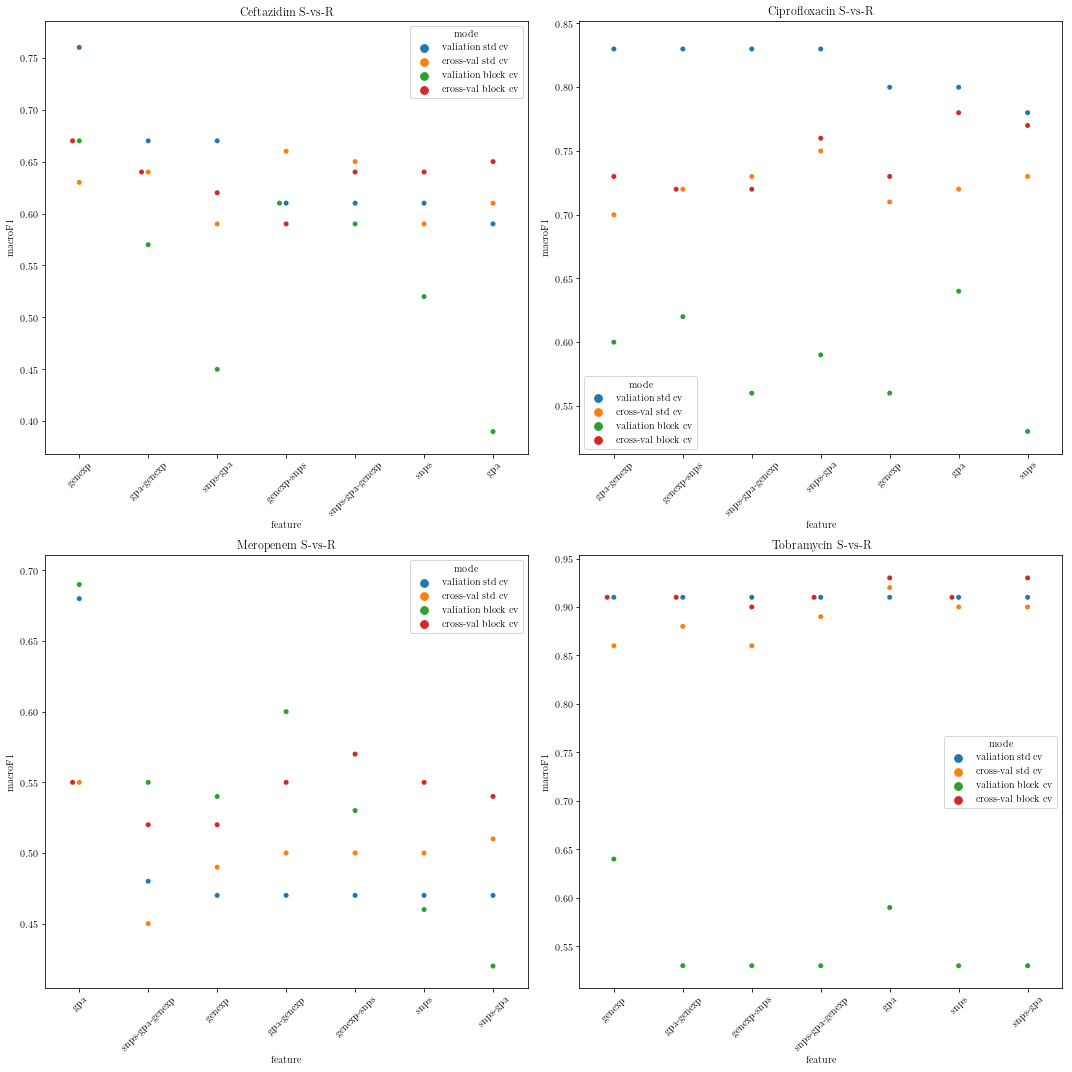

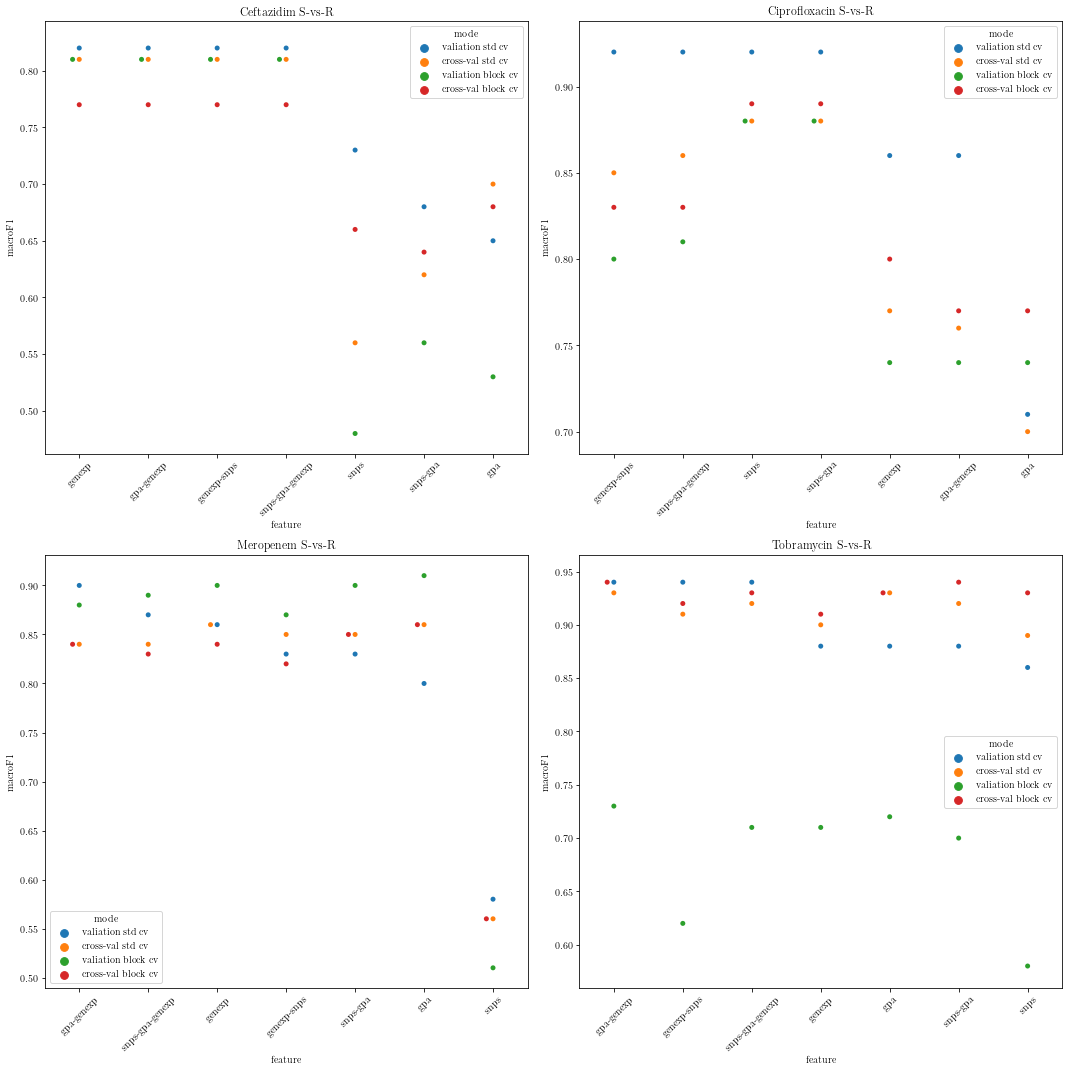

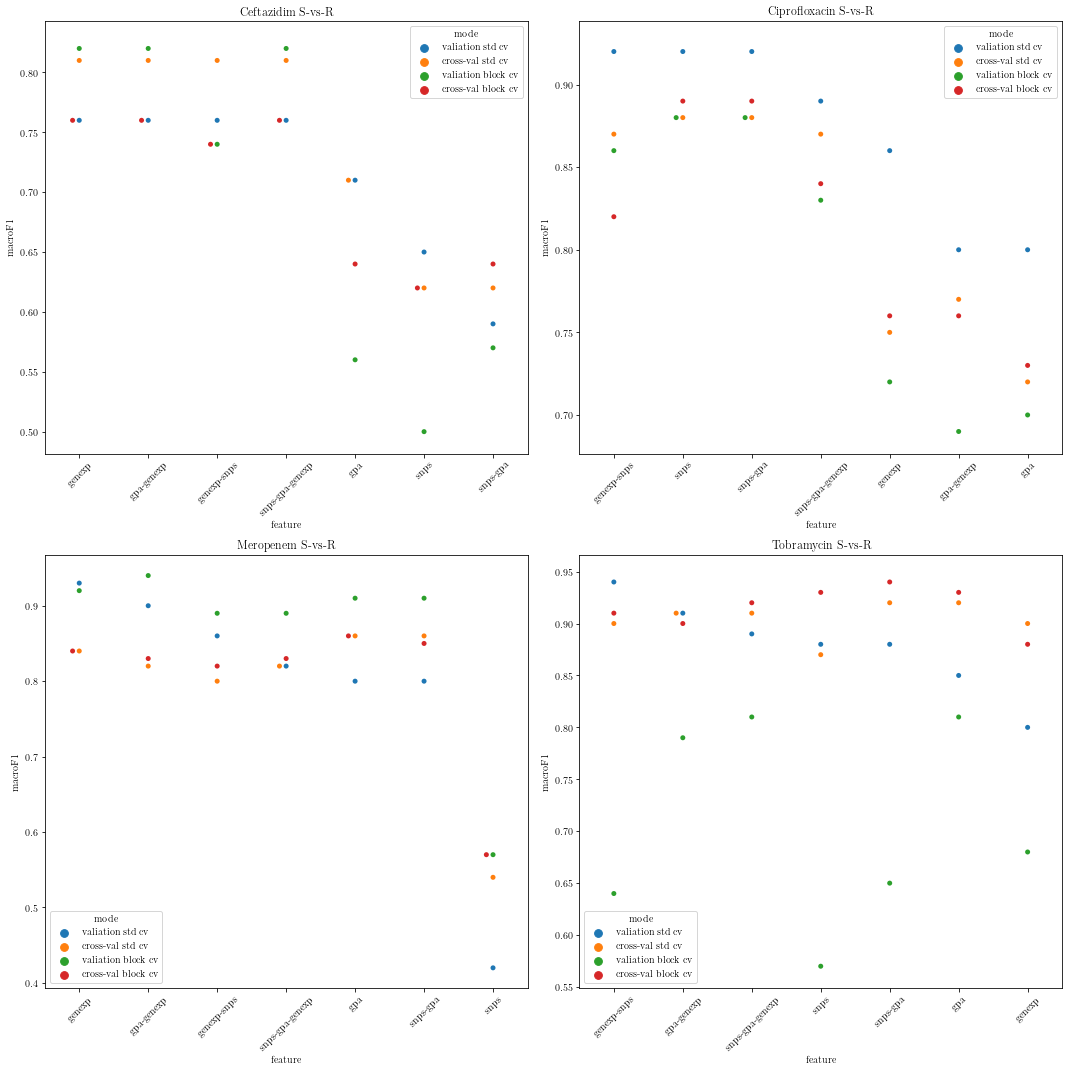

In [78]:
for cls in ['RF','LR','SVM']:
    plt.figure(figsize=(15,15))
    for idx, phenotype in enumerate(phenotypes):
        plt.subplot(len(phenotypes)/2,len(phenotypes)/2,idx+1)
        frame=[]
        for sheet,mode in sheets.items():
            df=pd.read_excel('/mounts/data/proj/asgari/classifications.xls',sheet_name=sheet)
            #print(set(df['phenotype'].tolist()))
            df=df[df['classifier']==cls][df['phenotype']==phenotype][df['feature'].isin(features)].copy()
            df=df[['feature','macroF1']].copy()
            df['mode']=mode
            frame.append(df.copy())
        result = pd.concat(frame).copy()
        result=result.replace({"feature": feature_map})
        plt.title(phenotype.replace('_',' '))
        sns.swarmplot(x="feature", y="macroF1", 
                      data=result, 
                      hue='mode',
                      size=5, );
        plt.xticks(rotation=45)
    plt.tight_layout()

In [33]:
plt.savefig('')

,feature,macroF1,mode
38,genexp,0.67,cross-val block cv
43,gpa##roary,0.65,cross-val block cv
49,genexp##gpa##roary,0.64,cross-val block cv
50,genexp##snps##gpa##roary,0.64,cross-val block cv
52,snps,0.64,cross-val block cv
66,snps##gpa##roary,0.62,cross-val block cv
87,genexp##snps,0.59,cross-val block cv


In [3]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="State", y="Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new',
              size=5);

NameError: name 'state_crime_four_states' is not defined